# San Francisco criminal data analysis, summer 2014

This document presents an analysis of the criminal data of summer 2014 from San Francisco. We will focus on the variation of incidents by neighborhood and by time of the day.

Let's start by loading the data and the appropiate libraries. We use python with pandas and numpy libraries for manipulating the data, and matplotlib for plotting it.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sanf = pd.read_csv("sanfrancisco_incidents_summer_2014.csv")

We take a look to the general structure of the data. It looks like it is composed of 13 columns, but for our purposes we will only use a subset of them. It is interesting to note that the variables Time and Date are stored as strings, so in order to make some sense of them we may need some preprocessing.

In [2]:
sanf.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,140734311,ARSON,ARSON OF A VEHICLE,Sunday,08/31/2014,23:50,BAYVIEW,NONE,LOOMIS ST / INDUSTRIAL ST,-122.405647,37.738322,"(37.7383221869053, -122.405646994567)",14073431126031
1,140736317,NON-CRIMINAL,LOST PROPERTY,Sunday,08/31/2014,23:45,MISSION,NONE,400 Block of CASTRO ST,-122.435012,37.761768,"(37.7617677182954, -122.435012093789)",14073631771000
2,146177923,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,SOUTHERN,NONE,1000 Block of MISSION ST,-122.409795,37.780036,"(37.7800356268394, -122.409795194505)",14617792306244
3,146177531,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014,23:30,RICHMOND,NONE,FULTON ST / 26TH AV,-122.485263,37.772518,"(37.7725176473142, -122.485262988324)",14617753106244
4,140734220,NON-CRIMINAL,FOUND PROPERTY,Sunday,08/31/2014,23:23,RICHMOND,NONE,800 Block of LA PLAYA ST,-122.509895,37.772313,"(37.7723131976814, -122.509895418239)",14073422072000


In [3]:
sanf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28993 entries, 0 to 28992
Data columns (total 13 columns):
IncidntNum    28993 non-null int64
Category      28993 non-null object
Descript      28993 non-null object
DayOfWeek     28993 non-null object
Date          28993 non-null object
Time          28993 non-null object
PdDistrict    28993 non-null object
Resolution    28993 non-null object
Address       28993 non-null object
X             28993 non-null float64
Y             28993 non-null float64
Location      28993 non-null object
PdId          28993 non-null int64
dtypes: float64(2), int64(2), object(9)
memory usage: 2.9+ MB


## Incidents by neighborhood

Let's start with an overview of incidents by neighborhood:

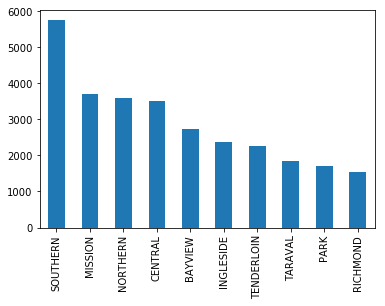

In [7]:
sanf.PdDistrict.value_counts().plot(kind="bar")

Looks like most of the incidents come from the southern district, with mission, northern and central following, but with a noticeable gap in quantity.

### Which incidents are most common in the city center?
In order to answer this question, we will select only entries of central district and plot the categories of each incident:

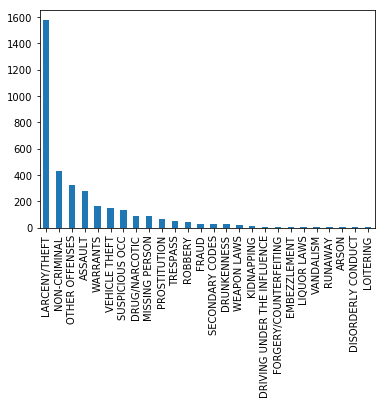

In [8]:
sanf[sanf.PdDistrict == "CENTRAL"].Category.value_counts().plot(kind="bar")

Looking at the data, we can see that the great majority of incidents on this district are larceny and thefts, by a large margin.

### In what areas of neighborhoods are robberies or thefts most common?
We now are going to select robberies and thefts and plot them by districts:

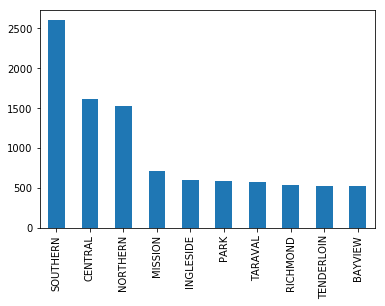

In [10]:
sanf[(sanf.Category == "LARCENY/THEFT") | (sanf.Category == "ROBBERY")].PdDistrict.value_counts().plot(kind="bar")

The neighborhoods with more of this kind of activity are southern, central and nothern, with southern having the highest number of incidents. 

## Incidents by the time of the day
In order to make use of the Time attribute, we are going to do some preprocessing steps. We will create two variables: Hour and Minute, in order to extract and use some order information.

In [12]:
# Split Time varable using ':' as delimiter, then converting the result to integer
sanf["Hour"] = sanf.Time.apply(lambda x: x.split(":")[0]).astype(np.int64)
sanf["Minute"] = sanf.Time.apply(lambda x: x.split(":")[1]).astype(np.int64)

Plotting the number of incidets by hour will give us an overview of the activity during the day

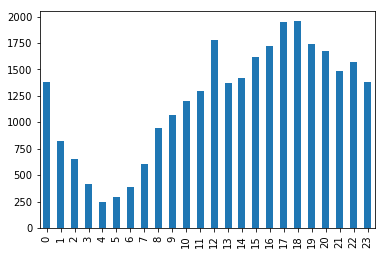

In [41]:
sanf.sort_values("Hour").Hour.value_counts().sort_index().plot(kind="bar")

From the data we can conclude that most of the activity is happening during the evening, and it decreases during deep hours in the night.

### Most common incidents in the evening

Let's now get more detail of what is happening in the evening. We will consideer evening the time period between 4pm and 21pm:

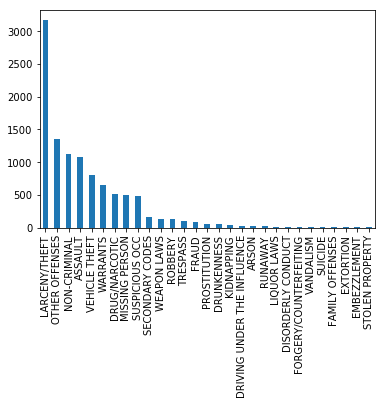

In [42]:
sanf[(sanf.Hour >= 16) & (sanf.Hour <= 21)].Category.value_counts().plot(kind="bar")

Data shows that most of the incidents during the evening are thefts, but there is also an important number of assaults and incidents classified as "other offenses" and "non-criminal".

### Most common period of the day for robberies
We are now going to check the number of robberies by time of the day:

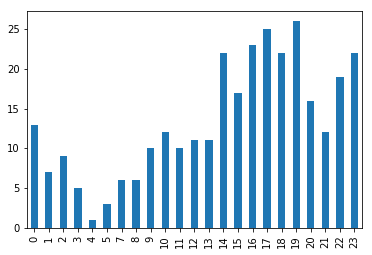

In [45]:
sanf[sanf.Category == "ROBBERY"].Hour.value_counts().sort_index().plot(kind="bar")

It can be seen that the plot correlates with the overview of the activity during the day. Looks like most of the robberies are happening during 2pm - 19pm.

## Conclusions
We have performed an analysis on San Francisco crime data for 2014, with an emphasis on incident variation by neighborhood and by time of the day. Results show that the most conflictive area is Southern area, and that most incidents in general are thefts, reported mainly in the evening.